In [123]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [124]:
data = load_breast_cancer()

In [125]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [126]:
data.data.shape

(569, 30)

In [127]:
data.target

#可以看到，乳腺癌数据集有569条记录，30个特征，单看维度虽然不算太高，但是样本量非常少。过拟合的情况可能存在。

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [128]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score_pre

0.9648809523809524

0.9631265664160402 71


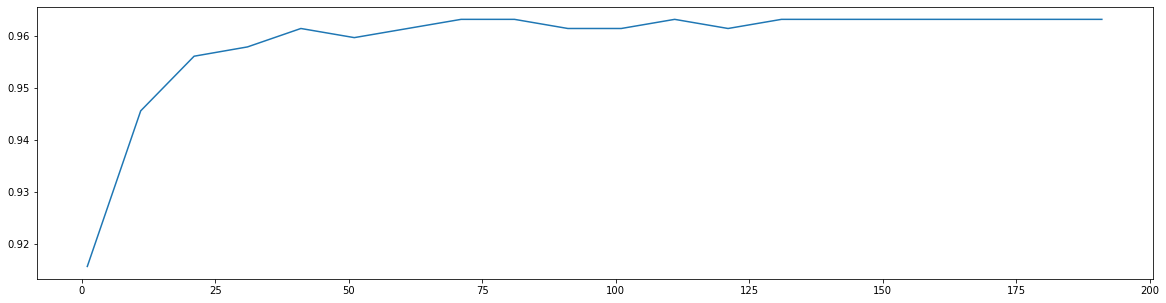

In [129]:
"""
在这里我们选择学习曲线，可以使用网格搜索吗？可以，但是只有学习曲线，才能看见趋势
我个人的倾向是，要看见n_estimators在什么取值开始变得平稳，是否一直推动模型整体准确率的上升等信息
第一次的学习曲线，可以先用来帮助我们划定范围，我们取每十个数作为一个阶段，来观察n_estimators的变化如何
引起模型整体准确率的变化
"""
#####【TIME WARNING: 30 seconds】#####
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
#                                 n_jobs=-1, #这个参数不知为何无法使用
                                random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
    
print(max(scorel),(scorel.index(max(scorel))*10)+1)

plt.figure(figsize=[20,5]) #画布的比列
plt.plot(range(1,201,10),scorel) #横坐标，纵坐标时数值
plt.show()
#list.index([object])
#返回这个object在列表list中的索引

0.9666353383458647 73


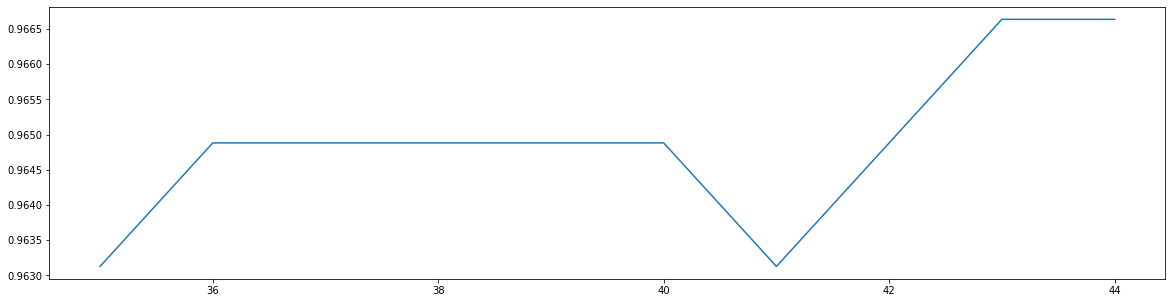

In [130]:
scorel = []
for i in range(65,75):
    rfc = RandomForestClassifier(n_estimators=i,
#                                 n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(65,75)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)
plt.show()

In [131]:
#网格搜索：能够帮助我们同时调整多个参数的技术，枚举技术

"""
有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势
从曲线跑出的结果中选取一个更小的区间，再跑曲线
param_grid = {'n_estimators':np.arange(0, 200, 10)}
param_grid = {'max_depth':np.arange(1, 20, 1)}
    
param_grid = {'max_leaf_nodes':np.arange(25,50,1)}
 对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围
有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这
样的参数我们就可以直接跑网格搜索
param_grid = {'criterion':['gini', 'entropy']}
param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
 
param_grid = {'max_features':np.arange(5,30,1)} 
"""

"\n有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势\n从曲线跑出的结果中选取一个更小的区间，再跑曲线\nparam_grid = {'n_estimators':np.arange(0, 200, 10)}\nparam_grid = {'max_depth':np.arange(1, 20, 1)}\n \xa0 \xa0\nparam_grid = {'max_leaf_nodes':np.arange(25,50,1)}\n 对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围\n有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这\n样的参数我们就可以直接跑网格搜索\nparam_grid = {'criterion':['gini', 'entropy']}\nparam_grid = {'min_samples_split':np.arange(2, 2+20, 1)}\nparam_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}\n \nparam_grid = {'max_features':np.arange(5,30,1)} \n"

In [132]:
#网格搜索
#调整max_depth

param_grid = {'max_depth':np.arange(1, 20, 1)} #函数返回一个有终点和起点的固定步长的排列
# 一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
# 但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
#   更应该画出学习曲线，来观察深度对模型的影响

rfc = RandomForestClassifier(n_estimators=39
                            ,random_state=90
                            )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=39, random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [133]:
GS.best_params_ #显示调整出来的最佳参数

{'max_depth': 6}

In [134]:
GS.best_score_ #返回调整好的最佳参数对应的准确率

0.9631265664160402

In [135]:
#调整max_features
param_grid = {'max_features':np.arange(5,30,1)} 
"""
默认max_features为features个数的开平方 30开平= 5
max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。我
们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将max_features往哪边调。
现在模型位于图像左侧，我们需要的是更高的复杂度，因此我们应该把max_features往更大的方向调整，可用的特征
越多，模型才会越复杂。max_features的默认最小值是sqrt(n_features)，因此我们使用这个值作为调参范围的
最小值。
"""
rfc = RandomForestClassifier(n_estimators=39
                            ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=39, random_state=90),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [136]:
GS.best_params_ #显示调整出来的最佳参数

{'max_features': 6}

In [137]:
GS.best_score_ #返回调整好的最佳参数对应的准确率

0.968421052631579

In [138]:
#调整min_samples_leaf
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度
rfc = RandomForestClassifier(n_estimators=39
                            ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=39, random_state=90),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [139]:
GS.best_params_

{'min_samples_leaf': 4}

In [140]:
GS.best_score_

0.9613721804511279

In [141]:
#调整min_samples_split
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=39
                            ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=39, random_state=90),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [142]:
GS.best_params_

{'min_samples_split': 3}

In [143]:
GS.best_score_

0.9613721804511279

In [144]:
#调整Criterion
param_grid = {'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=39
                            ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=39, random_state=90),
             param_grid={'criterion': ['gini', 'entropy']})

In [145]:
GS.best_params_

{'criterion': 'entropy'}

In [146]:
GS.best_score_

0.9649122807017543

In [147]:
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score

0.9578634085213033

In [148]:
score - score_pre

-0.007017543859649145